In [1]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from sklearn.preprocessing import StandardScaler

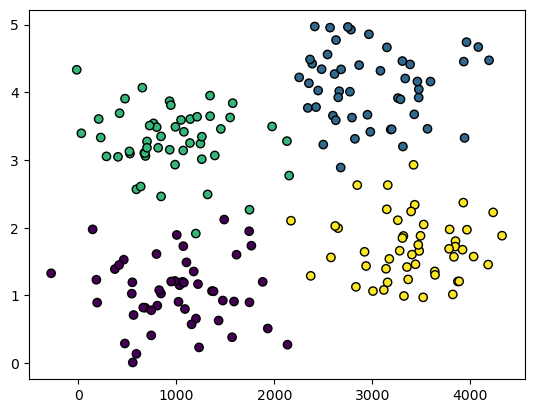

In [2]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [4]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [5]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [6]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [7]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

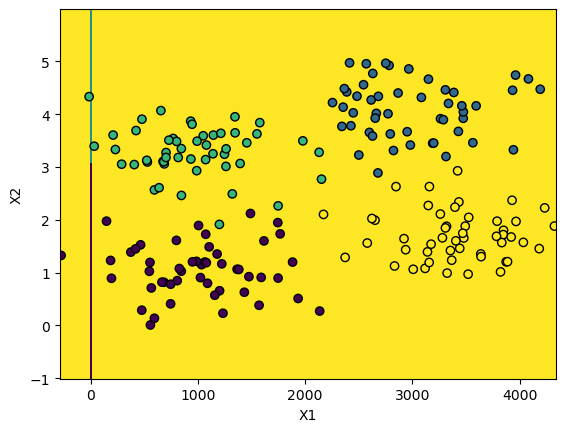

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

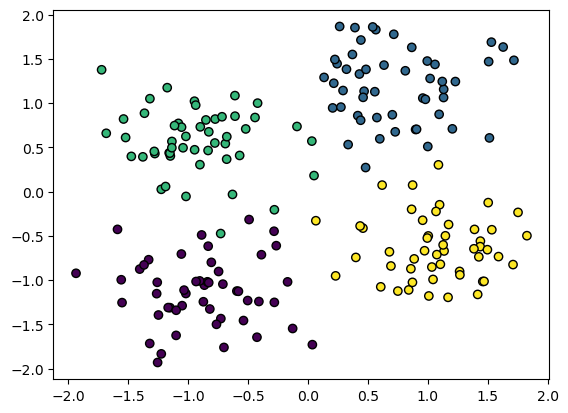

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


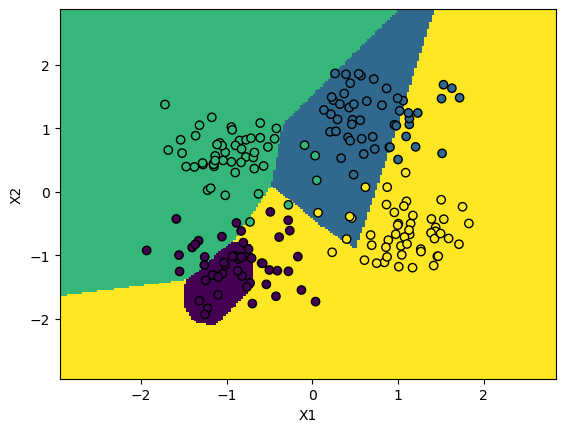

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]], dtype=int64)

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
confusion_matrix(y, clf.predict(X))

Iteration 1, loss = 1.51328458
Iteration 2, loss = 1.51075233
Iteration 3, loss = 1.50822814
Iteration 4, loss = 1.50571896
Iteration 5, loss = 1.50322045
Iteration 6, loss = 1.50073333
Iteration 7, loss = 1.49826313
Iteration 8, loss = 1.49580137
Iteration 9, loss = 1.49334782
Iteration 10, loss = 1.49090546
Iteration 11, loss = 1.48847557
Iteration 12, loss = 1.48605531
Iteration 13, loss = 1.48364221
Iteration 14, loss = 1.48122984
Iteration 15, loss = 1.47883255
Iteration 16, loss = 1.47645665
Iteration 17, loss = 1.47409502
Iteration 18, loss = 1.47174447
Iteration 19, loss = 1.46940791
Iteration 20, loss = 1.46708651
Iteration 21, loss = 1.46477714
Iteration 22, loss = 1.46247061
Iteration 23, loss = 1.46017154
Iteration 24, loss = 1.45788062
Iteration 25, loss = 1.45559762
Iteration 26, loss = 1.45332631
Iteration 27, loss = 1.45106648
Iteration 28, loss = 1.44881983
Iteration 29, loss = 1.44658629
Iteration 30, loss = 1.44436136
Iteration 31, loss = 1.44214691
Iteration 32, los

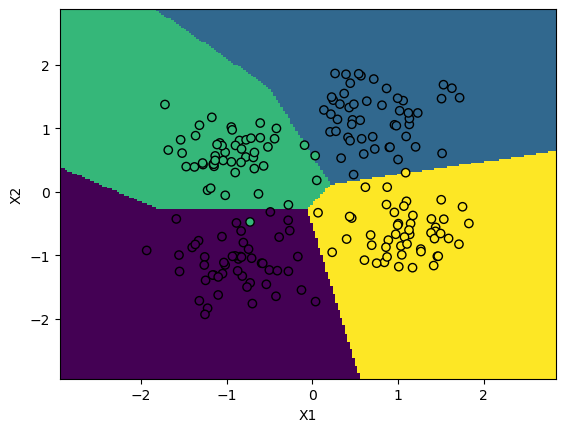

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  1, 48,  0],
       [ 0,  1,  0, 49]], dtype=int64)

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X, y)

X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


confusion_matrix(y, clf.predict(X))

In [13]:
def make_model_out(X,y,show_mass=False,search_time=False,scale_x=False,**kwargs):
    if search_time:
        start_time = time.time()  # Начало замера времени
        clf = MLPClassifier(**kwargs).fit(X, y)
        linear_time = time.time() - start_time  # Конец замера времени

        print(f"Время обучения модели: {linear_time:.4f} секунд")
    else:
         clf = MLPClassifier(**kwargs).fit(X, y)

    if scale_x:
        scaler = StandardScaler().fit(X)
        X = scaler.transform(X)


    X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


    print(confusion_matrix(y, clf.predict(X)),'\n\n')
    print("Score = ", clf.score(X, y))
    
    if show_mass:
        print("\nВеса между входным и скрытым слоем:")
        print(clf.coefs_[0])
        print("\nВеса между скрытым и выходным слоем:")
        print(clf.coefs_[1])
        print("Веса смещения для скрытого слоя:")
        print(clf.intercepts_[0])
        print("\nВеса смещения для выходного слоя:")
        print(clf.intercepts_[1])
    return clf

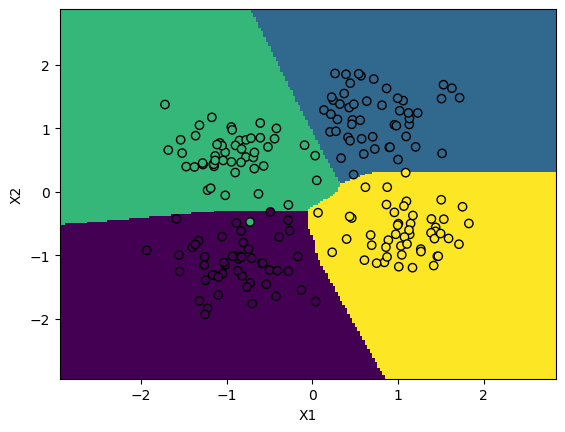

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.995


In [14]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X, y)


X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


print(confusion_matrix(y, clf.predict(X)),'\n\n')
print("Score = ", clf.score(X, y))

# Задания для самостоятельного выполнения

## 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

### 1

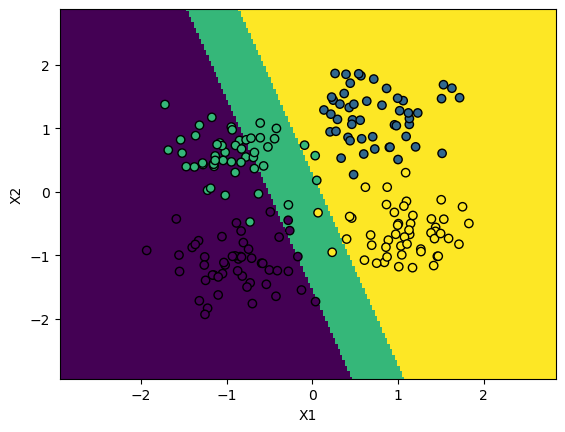

[[47  0  3  0]
 [ 0  0  0 50]
 [36  0 11  3]
 [ 0  0  2 48]] 


Score =  0.53


MLPClassifier(hidden_layer_sizes=[1], max_iter=10000)

In [15]:
make_model_out(X,y,hidden_layer_sizes=[1], max_iter=10_000)

### 2

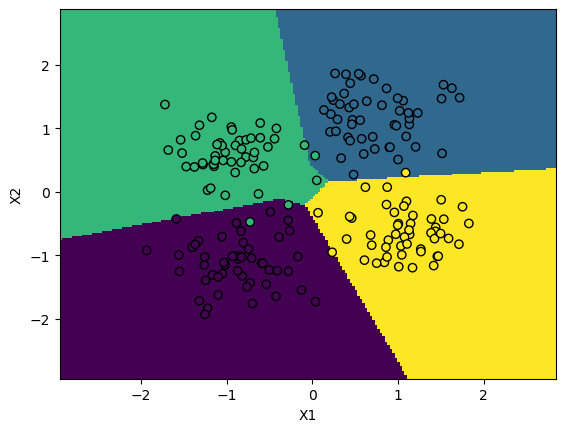

[[50  0  0  0]
 [ 0 50  0  0]
 [ 2  1 47  0]
 [ 1  1  0 48]] 


Score =  0.975


MLPClassifier(hidden_layer_sizes=[2], max_iter=10000)

In [16]:
make_model_out(X,y,hidden_layer_sizes=[2], max_iter=10_000)

### 10

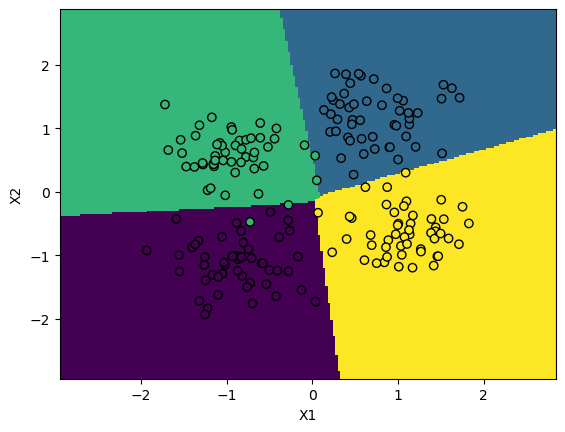

[[50  0  0  0]
 [ 0 50  0  0]
 [ 2  1 47  0]
 [ 0  0  0 50]] 


Score =  0.985


MLPClassifier(hidden_layer_sizes=[10], max_iter=10000)

In [17]:
make_model_out(X,y,hidden_layer_sizes=[10], max_iter=10_000)

### 100

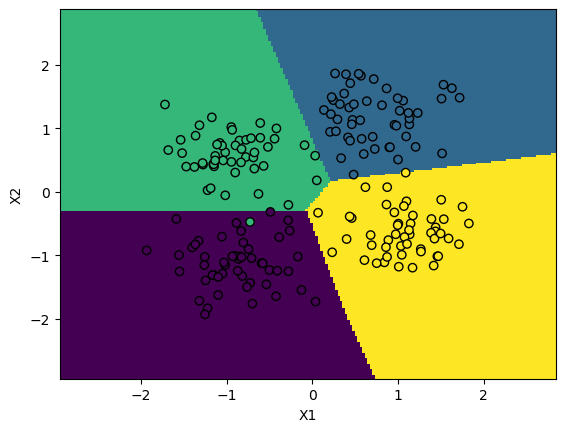

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.995


MLPClassifier(hidden_layer_sizes=[100], max_iter=10000)

In [18]:
make_model_out(X,y,hidden_layer_sizes=[100], max_iter=10_000)

Не всегда с увеличением количества нейронов увеличивается качество модели


## 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

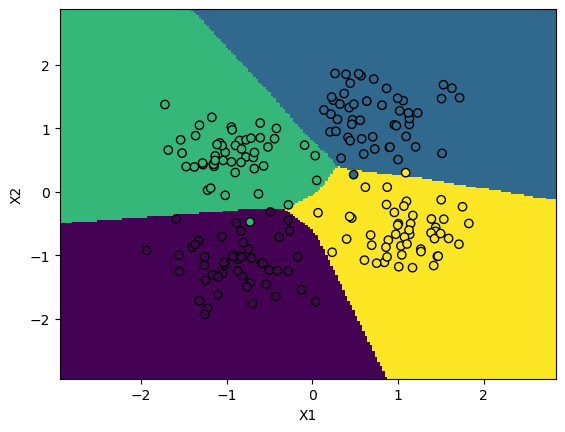

[[50  0  0  0]
 [ 0 49  0  1]
 [ 1  0 49  0]
 [ 0  1  0 49]] 


Score =  0.985


MLPClassifier(hidden_layer_sizes=[6, 6], max_iter=10000)

In [19]:
make_model_out(X,y,hidden_layer_sizes=[6,6], max_iter=10_000)

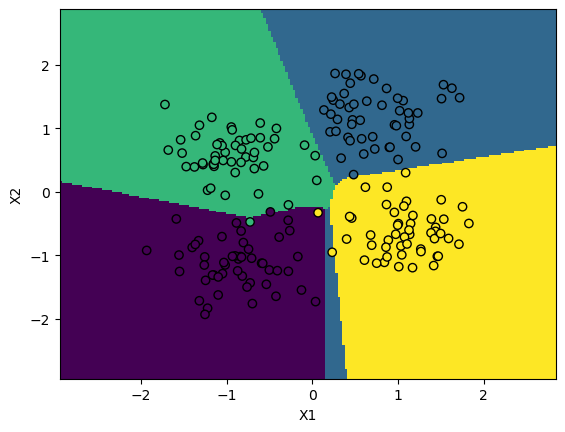

[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 1  1  0 48]] 


Score =  0.98


MLPClassifier(hidden_layer_sizes=[6, 6, 6], max_iter=10000)

In [20]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6], max_iter=10_000)

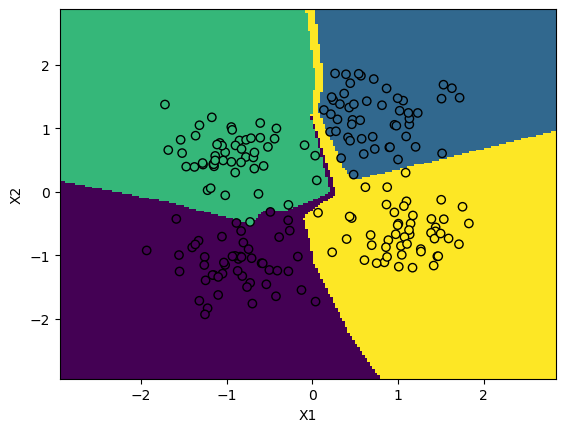

[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]] 


Score =  1.0


MLPClassifier(hidden_layer_sizes=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6], max_iter=10000)

In [21]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6,6,6,6,6,6,6,6], max_iter=10_000)

Для этих данных достаточно трех слоев

## 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

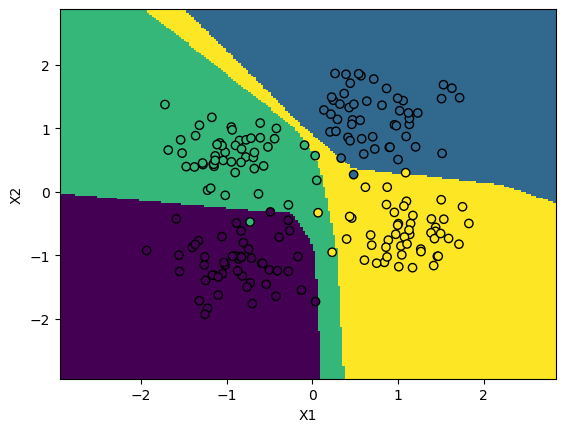

[[50  0  0  0]
 [ 0 49  0  1]
 [ 1  0 48  1]
 [ 0  1  2 47]] 


Score =  0.97

Веса между входным и скрытым слоем:
[[ 7.83496237e-01 -3.65200418e-01  1.27576307e+00 -5.13084225e-13
   1.36517193e+00 -1.56410785e+00]
 [ 9.68373151e-01  7.06329579e-01 -1.67713538e-02 -9.79866332e-22
   6.05736430e-02 -2.07482338e-01]]

Веса между скрытым и выходным слоем:
[[-5.19548218e-01 -5.92619280e-02  1.09537920e+00  1.29171980e+00
   1.34089208e+00 -2.09435508e-01]
 [ 6.85155779e-01 -5.54325955e-02 -3.58423024e-01  9.06615089e-01
   1.01287997e+00 -9.42058013e-01]
 [ 9.69100946e-01 -1.75355734e-11  1.24984482e+00 -4.73691404e-02
   8.69578336e-01  5.55629421e-02]
 [-4.37635569e-11  2.11102368e-02 -3.70893729e-02  4.17569863e-02
  -7.85725888e-09  1.37675273e-07]
 [ 1.37597171e+00  7.80363524e-11  7.40107952e-01 -1.66029495e-01
   9.96224690e-01  1.03314731e-01]
 [ 6.06233793e-02  6.66155913e-03 -2.34873932e-01 -1.22903285e+00
  -1.21022732e-01  1.32639937e+00]]
Веса смещения для скрытого слоя:
[-0.

MLPClassifier(hidden_layer_sizes=[6, 6, 6], max_iter=10000)

In [22]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6], max_iter=10_000, show_mass=True)

## 4.Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

### 20 слоев

Время обучения модели: 0.5072 секунд


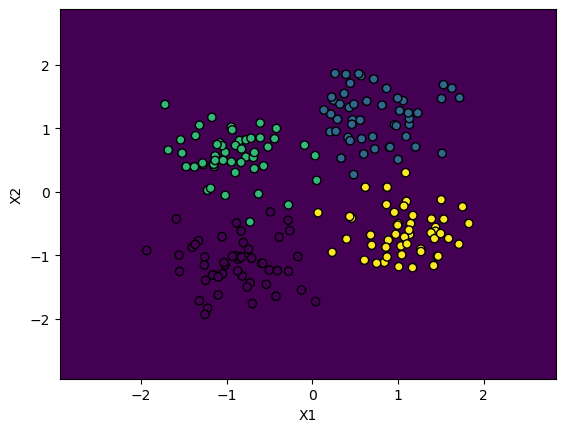

[[ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]] 


Score =  0.25


MLPClassifier(hidden_layer_sizes=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
                                  6, 6, 6, 6, 6],
              max_iter=10000)

In [23]:
make_model_out(X,y,hidden_layer_sizes=[6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], max_iter=10_000, search_time=True)

### 2 слоя

Время обучения модели: 0.2991 секунд


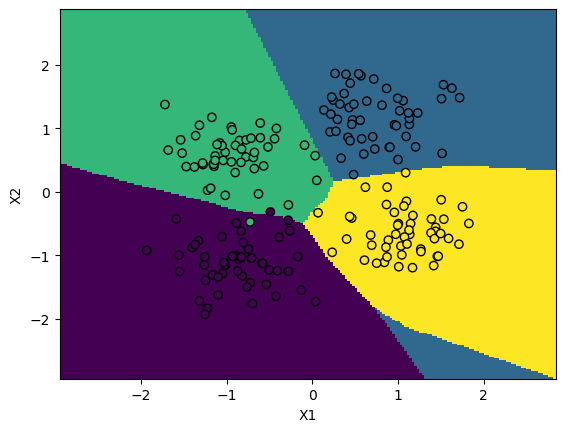

[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]] 


Score =  0.99


MLPClassifier(hidden_layer_sizes=[6, 6], max_iter=10000)

In [24]:
make_model_out(X,y,hidden_layer_sizes=[6,6], max_iter=10_000, search_time=True)

Для этих данных множество слоев играет ухудшающую роль как в качестве модели, так и во времени ее обучения

## 5.Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [25]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = dataset.data, dataset.target
y = y.astype(int)

In [ ]:

make_model_out(X,y,hidden_layer_sizes=[6,6], max_iter=10_000, search_time=True, scale_x=True)

In [ ]:

make_model_out(X,y,hidden_layer_sizes=[12,12,12], max_iter=10_000, search_time=True, scale_x=True)

## 6.Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.